# 環境建立

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip "/content/drive/MyDrive/computer_vision/train.zip" -d "/content/computer_vision"
!unzip "/content/drive/MyDrive/computer_vision/test.zip" -d "/content/computer_vision"

串流輸出內容已截斷至最後 5000 行。
  inflating: /content/computer_vision/test/油菜/2021.jpg  
  inflating: /content/computer_vision/test/油菜/2024.jpg  
  inflating: /content/computer_vision/test/油菜/2025.jpg  
  inflating: /content/computer_vision/test/油菜/2035.jpg  
  inflating: /content/computer_vision/test/油菜/2038.jpg  
  inflating: /content/computer_vision/test/油菜/2039.jpg  
  inflating: /content/computer_vision/test/油菜/2041.jpg  
  inflating: /content/computer_vision/test/油菜/2047.jpg  
  inflating: /content/computer_vision/test/油菜/2059.jpg  
  inflating: /content/computer_vision/test/油菜/2061.jpg  
  inflating: /content/computer_vision/test/油菜/2068.jpg  
  inflating: /content/computer_vision/test/油菜/2072.jpg  
  inflating: /content/computer_vision/test/油菜/2077.jpg  
  inflating: /content/computer_vision/test/油菜/2085.jpg  
  inflating: /content/computer_vision/test/油菜/2087.jpg  
  inflating: /content/computer_vision/test/油菜/2093.jpg  
  inflating: /content/computer_vision/test/油菜/2097.jpg  
  inflatin

In [ ]:
!nvidia-smi
%env SM_FRAMEWORK=tf.keras

Sat Jun 19 08:40:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install keras_applications

     |████████████████████████████████| 51kB 6.0MB/s 


In [ ]:
# stable
!pip install -U efficientnet

# latest - with keras and tf.keras support
!pip install -U --pre efficientnet

# source 
!pip install -U git+https://github.com/qubvel/efficientnet

Requirement already up-to-date: efficientnet in /usr/local/lib/python3.7/dist-packages (1.1.1)
  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-n7z2jr_y
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-n7z2jr_y
  Created wheel for efficientnet: filename=efficientnet-1.1.1-cp37-none-any.whl size=18436 sha256=90ab7d9af803e665a72b9c723b552319fec50774d2bc31d77311457ae4acfd08
  Stored in directory: /tmp/pip-ephem-wheel-cache-hp8oonp8/wheels/64/60/2e/30ebaa76ed1626e86bfb0cc0579b737fdb7d9ff8cb9522663a
Successfully built efficientnet
  Found existing installation: efficientnet 1.1.1
    Uninstalling efficientnet-1.1.1:
      Successfully uninstalled efficientnet-1.1.1


# 整理訓練資料

In [ ]:
%env SM_FRAMEWORK=tf.keras
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Flatten, Dense, Dropout
from tensorflow.python.keras.applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import os
import pickle

# 資料路徑
DATASET_PATH  = '/content/computer_vision'

# 影像大小
IMAGE_SIZE = (224, 224)

# 影像類別數
NUM_CLASSES = 50

# 若 GPU 記憶體不足，可調降 batch size 或凍結更多層網路
BATCH_SIZE = 16

# 凍結網路層數
FREEZE_LAYERS = 2

# Epoch 數
NUM_EPOCHS = 2

model_h5="model-efficientnet-final_B7"
# 模型輸出儲存的檔案
WEIGHTS_FINAL = '/content/drive/MyDrive/computer_vision/model/'+model_h5

# 透過 data augmentation 產生訓練與驗證用的影像資料
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_batches = train_datagen.flow_from_directory(DATASET_PATH + '/train',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE)

valid_datagen = ImageDataGenerator()
valid_batches = valid_datagen.flow_from_directory(DATASET_PATH + '/test',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=BATCH_SIZE)

# 輸出各類別的索引值
for cls, idx in train_batches.class_indices.items():
    print('Class #{} = {}'.format(idx, cls))

env: SM_FRAMEWORK=tf.keras
Found 27903 images belonging to 50 classes.
Found 7002 images belonging to 50 classes.
Class #0 = 三杯雞
Class #1 = 什錦炒麵
Class #2 = 咖哩雞
Class #3 = 塔香海茸
Class #4 = 大陸妹
Class #5 = 客家小炒
Class #6 = 小番茄
Class #7 = 有機小松菜
Class #8 = 有機青松菜
Class #9 = 木瓜
Class #10 = 柳丁
Class #11 = 棗子
Class #12 = 橘子
Class #13 = 沙茶肉片
Class #14 = 油菜
Class #15 = 洋蔥炒蛋
Class #16 = 滷蛋
Class #17 = 滷雞腿
Class #18 = 玉米炒蛋
Class #19 = 瓜仔肉
Class #20 = 番茄炒蛋
Class #21 = 白米飯
Class #22 = 白菜滷
Class #23 = 福山萵苣
Class #24 = 空心菜
Class #25 = 糖醋雞丁
Class #26 = 紅蘿蔔炒蛋
Class #27 = 義大利麵
Class #28 = 芥藍菜
Class #29 = 菠菜
Class #30 = 葡萄
Class #31 = 蒜泥白肉
Class #32 = 蒸蛋
Class #33 = 蓮霧
Class #34 = 螞蟻上樹
Class #35 = 西瓜
Class #36 = 豆芽菜
Class #37 = 關東煮
Class #38 = 青江菜
Class #39 = 香蕉
Class #40 = 香酥魚排
Class #41 = 馬鈴薯燉肉
Class #42 = 高麗菜
Class #43 = 鳳梨
Class #44 = 鵝白菜
Class #45 = 鹽酥雞
Class #46 = 麥克雞塊
Class #47 = 麻婆豆腐
Class #48 = 麻油雞
Class #49 = 黑胡椒豬柳


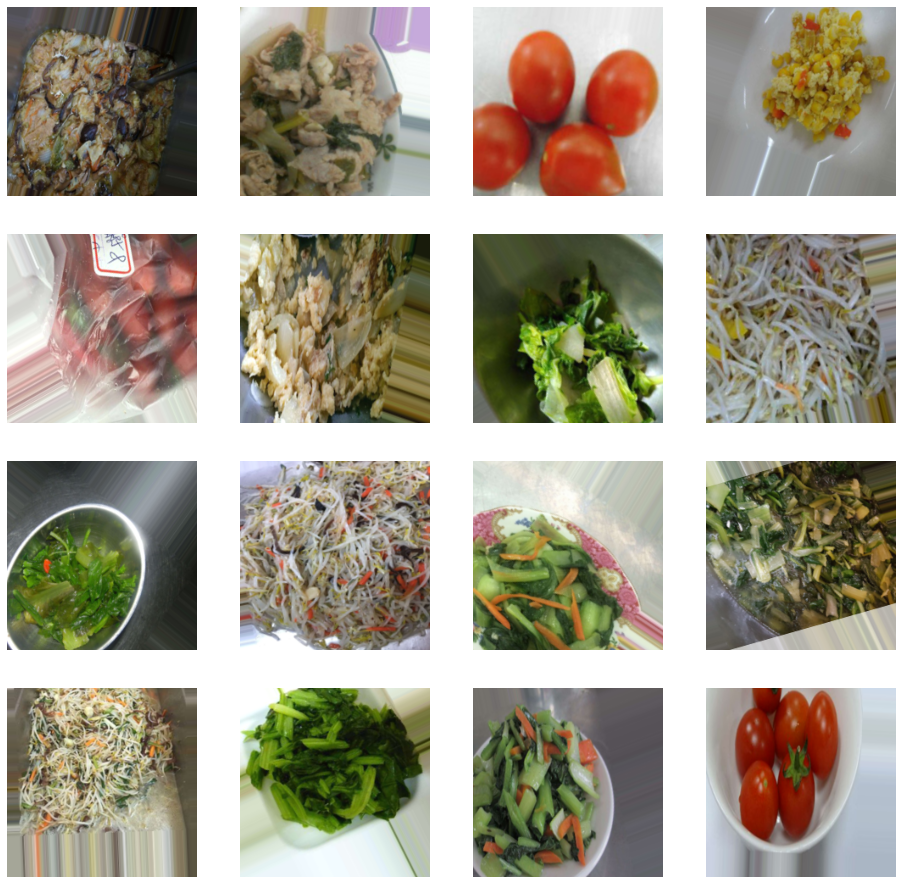

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

magic_num = math.ceil(math.sqrt(BATCH_SIZE))
imgs = np.copy(train_batches[0][0]).astype(int)
plt.figure(figsize=(16, 16))
for i, img in enumerate(imgs):
    plt.subplot(magic_num, magic_num, i+1)
    plt.axis('off')
    plt.imshow(img)

# 訓練

load pretrain weight

In [ ]:
#!/usr/bin/python3
#!--*-- coding: utf-8 --*--
from efficientnet.tfkeras import EfficientNetB7
from efficientnet.tfkeras import center_crop_and_resize, preprocess_input
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.python.keras.models import load_model


if os.path.isfile("/content/drive/MyDrive/computer_vision/model/"+model_h5+".h5"):
  print("load model")
  net_final = load_model("/content/drive/MyDrive/computer_vision/model/"+model_h5+".h5")
else:
  # 加载预训练模型，作为 conv base model
  net = EfficientNetB7(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))

  x = net.output
  x = Flatten()(x)

  # 增加 DropOut layer
  x = Dropout(0.5)(x)

  # 增加 Dense layer，以 softmax 產生個類別的機率值
  output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)


  # 設定凍結與要進行訓練的網路層
  net_final = Model(inputs=net.input, outputs=output_layer)
  
print(len(net_final.layers))
for i, layer in enumerate(net_final.layers[:FREEZE_LAYERS]):
    # print(i, layer)
    layer.trainable = False
for i, layer in enumerate(net_final.layers[FREEZE_LAYERS:]):
    # print(i, layer)
    layer.trainable = True

# 使用 Adam optimizer，以較低的 learning rate 進行 fine-tuning
net_final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

# 輸出整個網路結構
print(net_final.summary())

file_path = "/content/drive/MyDrive/computer_vision/model/B7_loss.txt"

for i in range(NUM_EPOCHS):
  # 訓練模型
  HISTORY = net_final.fit(train_batches,
                          steps_per_epoch = train_batches.samples // BATCH_SIZE,
                          validation_data = valid_batches,
                          validation_steps = valid_batches.samples // BATCH_SIZE,
                          epochs = 3)
  net_final.save(WEIGHTS_FINAL+"_"+str(i)+'.h5')
  if os.path.isfile(file_path):
    history = pickle.load(open(file_path, "rb"))
    history['accuracy'] = history['accuracy'] + HISTORY.history['accuracy']
    history['val_accuracy'] = history['val_accuracy'] + HISTORY.history['val_accuracy']
    history['loss'] = history['loss'] + HISTORY.history['loss']
    history['val_loss'] = history['val_loss'] + HISTORY.history['val_loss']
  else:
    history = HISTORY.history

  with open(file_path, 'wb') as file_pi:
      pickle.dump(history, file_pi)
  # 儲存訓練好的模型


# 學習曲線

In [ ]:
import pickle
history = pickle.load(open('/content/drive/MyDrive/computer_vision/model/B7_loss.txt', "rb"))

total  39  epochs


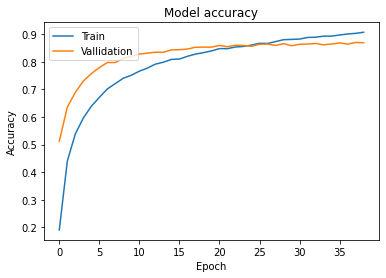

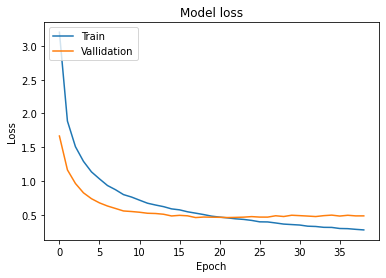

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print("total ", len(history['accuracy'])," epochs")

# write your code here
plt.plot(history['accuracy'])  
plt.plot(history['val_accuracy'])  
plt.title('Model accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['Train', 'Vallidation'], loc='upper left')  
plt.show() 

# write your code here
plt.plot(history['loss'])  
plt.plot(history['val_loss'])  
plt.title('Model loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['Train', 'Vallidation'], loc='upper left')  
plt.show() 

# test

In [ ]:
import efficientnet.keras as efn 
from efficientnet.tfkeras import EfficientNetB0
from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

## 所有圖片test(show ACCURACY)
載入模型以及檔案路徑

In [ ]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.preprocessing import image
import numpy as np
from functools import partial
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)

# 載入訓練好的模型
net = load_model("/content/drive/MyDrive/computer_vision/model/"+model_h5+".h5")
cls_list = []
# 輸出各類別的索引值
for cls, idx in train_batches.class_indices.items():
    cls_list.append(cls)
    print('Class #{} = {}'.format(idx, cls))
  
#!/usr/bin/python
# -*- coding: utf-8 -*-
from os import listdir
from os.path import isfile, isdir, join

# 指定要列出所有檔案的目錄
mypath = "/content/computer_vision/test/"

# 取得所有檔案與子目錄名稱
files = listdir(mypath)



Class #0 = 三杯雞
Class #1 = 什錦炒麵
Class #2 = 咖哩雞
Class #3 = 塔香海茸
Class #4 = 大陸妹
Class #5 = 客家小炒
Class #6 = 小番茄
Class #7 = 有機小松菜
Class #8 = 有機青松菜
Class #9 = 木瓜
Class #10 = 柳丁
Class #11 = 棗子
Class #12 = 橘子
Class #13 = 沙茶肉片
Class #14 = 油菜
Class #15 = 洋蔥炒蛋
Class #16 = 滷蛋
Class #17 = 滷雞腿
Class #18 = 玉米炒蛋
Class #19 = 瓜仔肉
Class #20 = 番茄炒蛋
Class #21 = 白米飯
Class #22 = 白菜滷
Class #23 = 福山萵苣
Class #24 = 空心菜
Class #25 = 糖醋雞丁
Class #26 = 紅蘿蔔炒蛋
Class #27 = 義大利麵
Class #28 = 芥藍菜
Class #29 = 菠菜
Class #30 = 葡萄
Class #31 = 蒜泥白肉
Class #32 = 蒸蛋
Class #33 = 蓮霧
Class #34 = 螞蟻上樹
Class #35 = 西瓜
Class #36 = 豆芽菜
Class #37 = 關東煮
Class #38 = 青江菜
Class #39 = 香蕉
Class #40 = 香酥魚排
Class #41 = 馬鈴薯燉肉
Class #42 = 高麗菜
Class #43 = 鳳梨
Class #44 = 鵝白菜
Class #45 = 鹽酥雞
Class #46 = 麥克雞塊
Class #47 = 麻婆豆腐
Class #48 = 麻油雞
Class #49 = 黑胡椒豬柳


In [ ]:
test_item_num = []
for f in tqdm(cls_list):
  fullpath = join(mypath, f)
  test_item_num.append(len(listdir(fullpath)))
  # print(len(listdir(fullpath)))


100%|██████████| 50/50 [00:00<00:00, 7418.56it/s]


### a. predict top1為正解 的ACC

In [ ]:
acc=0
test_num=0
y_true=[]
y_pred=[]

# 以迴圈處理
# print(cls_list)
for f in tqdm(cls_list):
  fullpath = join(mypath, f)
  # 判斷 fullpath 是檔案還是目錄
  for pict in listdir(fullpath):
    imgpath = join(fullpath, pict)
    #print(imgpath)
    img = image.load_img(imgpath, target_size=(224, 224), interpolation="bicubic")

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    pred = net.predict(x)[0]
    top_inds = pred.argsort()[::-1][:5]

    test_num=test_num+1
    # 大陸妹 與 福山萵苣 校正回歸
    if cls_list.index(f) == 4 or cls_list.index(f) == 23:
      if cls_list.index(f) == 4 and (pred.tolist()).index(max(pred)) == 23:
        acc = acc + 1
        y_true.append(cls_list.index(f))
        y_pred.append(4)
      elif cls_list.index(f) == 23 and (pred.tolist()).index(max(pred)) == 4:
        acc = acc + 1
        y_true.append(cls_list.index(f))
        y_pred.append(23)
      else:
        y_true.append(cls_list.index(f))
        y_pred.append((pred.tolist()).index(max(pred)))
    else:
      y_true.append(cls_list.index(f))
      y_pred.append((pred.tolist()).index(max(pred)))

    if (pred.tolist()).index(max(pred))==cls_list.index(f):
      acc=acc+1
print("Top1 accuracy : ", acc/test_num)

100%|██████████| 50/50 [14:56<00:00, 17.92s/it]

Top1 accuracy :  0.8745361119040822


### b. predict top5 以內有 正解 的ACC

In [ ]:
acc=0
test_num=0

# 以迴圈處理
for f in tqdm(cls_list):
  fullpath = join(mypath, f)
  # 判斷 fullpath 是檔案還是目錄
  for pict in listdir(fullpath):
    imgpath = join(fullpath, pict)
    #print(imgpath)
    img = image.load_img(imgpath, target_size=(224, 224), interpolation="bicubic")

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    pred = net.predict(x)[0]
    top_inds = pred.argsort()[::-1][:5]

    test_num=test_num+1
    top5=[]
    for i in top_inds:
      top5.append(i)
    if cls_list.index(f) == 4 or cls_list.index(f) == 23:
      if cls_list.index(f) in top5 or 4 in top5 or 23 in top5:
        acc=acc+1
    elif cls_list.index(f) in top5:
      acc=acc+1
print("Top5 accuracy : ",acc/test_num)

100%|██████████| 50/50 [14:31<00:00, 17.42s/it]

Top5 accuracy :  0.9868683985155581


### c. predict top2 以內有 正解 的ACC

In [ ]:
# acc=0
# test_num=0

# # 以迴圈處理
# for f in tqdm(cls_list):
#   fullpath = join(mypath, f)
#   # 判斷 fullpath 是檔案還是目錄
#   for pict in listdir(fullpath):
#     imgpath = join(fullpath, pict)
#     #print(imgpath)
#     img = image.load_img(imgpath, target_size=(224, 224), interpolation="bicubic")

#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis = 0)
#     pred = net.predict(x)[0]
#     top_inds = pred.argsort()[::-1][:2]

#     test_num=test_num+1
#     top5=[]
#     for i in top_inds:
#       top5.append(i)

#     if cls_list.index(f) == 4 or cls_list.index(f) == 23:
#       if cls_list.index(f) in top5 or 4 in top5 or 23 in top5:
#         acc=acc+1
#     elif cls_list.index(f) in top5:
#       acc=acc+1
# print("Top2 accuracy : ",acc/test_num)

### d. predict top3 以內有 正解 的ACC

In [ ]:
# acc=0
# test_num=0

# # 以迴圈處理
# for f in tqdm(cls_list):
#   fullpath = join(mypath, f)
#   # 判斷 fullpath 是檔案還是目錄
#   for pict in listdir(fullpath):
#     imgpath = join(fullpath, pict)
#     #print(imgpath)
#     #print(imgpath)
#     img = image.load_img(imgpath, target_size=(224, 224), interpolation="bicubic")

#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis = 0)
#     pred = net.predict(x)[0]
#     top_inds = pred.argsort()[::-1][:3]

#     test_num=test_num+1
#     top5=[]
#     for i in top_inds:
#       top5.append(i)

#     if cls_list.index(f) == 4 or cls_list.index(f) == 23:
#       if cls_list.index(f) in top5 or 4 in top5 or 23 in top5:
#         acc=acc+1
#     elif cls_list.index(f) in top5:
#       acc=acc+1
# print("Top3 accuracy : ",acc/test_num)

## 所有圖片test(show confuse_matrix)

Text(66.5, 0.5, 'true')

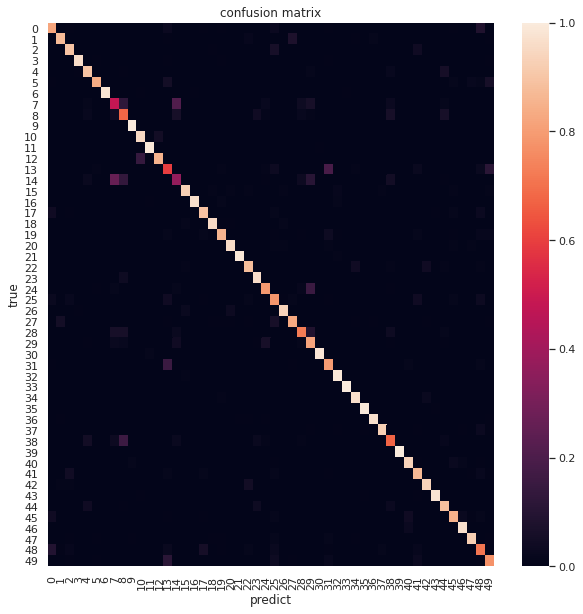

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# # 輸出各類別的索引值
# for cls, idx in train_batches.class_indices.items():
#     cls_list.append(cls)
#     print('Class #{} = {}'.format(idx, cls))

sns.set()
f,ax=plt.subplots(figsize=(10,10))
labels_list = list(range(NUM_CLASSES)) #建label index list

C2 = confusion_matrix(y_true, y_pred, labels=labels_list)
C2_ = []
for i in range(len((C2))):
  C2_.append(C2[i] / test_item_num[i])
sns.heatmap(C2_,annot=False,ax=ax,yticklabels=True,xticklabels=True) 
ax.set_title('confusion matrix') 
ax.set_xlabel('predict') 
ax.set_ylabel('true') 